In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


In [ ]:
import os
import urllib
import gzip
import struct
def download_data(url, force_download=True): 
    fname = url.split("/")[-1]
    if force_download or not os.path.exists(fname):
        urllib.request.urlretrieve(url, fname)
    return fname

def read_data(label_url, image_url):
    with gzip.open(download_data(label_url)) as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        label = np.fromstring(flbl.read(), dtype=np.int8)
    with gzip.open(download_data(image_url), 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        image = np.fromstring(fimg.read(), dtype=np.uint8).reshape(len(label), rows, cols)
    return (label, image)

path='http://yann.lecun.com/exdb/mnist/'
(train_lbl, train_img) = read_data(
    path+'train-labels-idx1-ubyte.gz', path+'train-images-idx3-ubyte.gz')
(val_lbl, val_img) = read_data(
    path+'t10k-labels-idx1-ubyte.gz', path+'t10k-images-idx3-ubyte.gz')

<ipython-input-51-1e1ffe346486>:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(flbl.read(), dtype=np.int8)
<ipython-input-51-1e1ffe346486>:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image = np.fromstring(fimg.read(), dtype=np.uint8).reshape(len(label), rows, cols)


In [ ]:
mnist = tf.keras.datasets.mnist
path='./mnist.npz'
(x_train, y_train), (x_test, y_test) = mnist.load_data(path)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

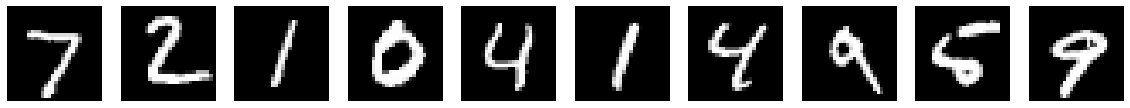

In [ ]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys_r')
    plt.axis('off')
plt.show()

In [ ]:
input_img = tf.keras.Input(shape=(28,28,))

In [ ]:
from keras.layers.serialization import activation


autoencoder = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Reshape((np.prod(x_train.shape[1:]),)),
  tf.keras.layers.Dense(128, activation='relu' , input_shape=(784,)),
  tf.keras.layers.Dense(32, activation='relu'),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(784, activation='sigmoid'),
  tf.keras.layers.Reshape((28,28)),

])

In [ ]:
autoencoder.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 reshape_36 (Reshape)        (None, 784)               0         
                                                                 
 dense_89 (Dense)            (None, 128)               100480    
                                                                 
 dense_90 (Dense)            (None, 32)                4128      
                                                                 
 dense_91 (Dense)            (None, 128)               4224      
                                                                 
 dense_92 (Dense)            (None, 784)               101136    
                                                                 
 reshape_37 (Reshape)        (None, 28, 28)          

In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
autoencoder_train =autoencoder.fit(x_train, x_train, 
                epochs=10,
                batch_size=784,
                shuffle=True, 
                validation_data=(x_test , x_test))

Epoch 1/10
77/77 [==============================] - 4s 50ms/step - loss: 0.3260 - val_loss: 0.2257
Epoch 2/10
77/77 [==============================] - 4s 46ms/step - loss: 0.1952 - val_loss: 0.1706
Epoch 3/10
77/77 [==============================] - 4s 46ms/step - loss: 0.1588 - val_loss: 0.1459
Epoch 4/10
77/77 [==============================] - 3s 45ms/step - loss: 0.1396 - val_loss: 0.1313
Epoch 5/10
77/77 [==============================] - 3s 45ms/step - loss: 0.1286 - val_loss: 0.1231
Epoch 6/10
77/77 [==============================] - 4s 46ms/step - loss: 0.1219 - val_loss: 0.1176
Epoch 7/10
77/77 [==============================] - 4s 46ms/step - loss: 0.1173 - val_loss: 0.1136
Epoch 8/10
77/77 [==============================] - 3s 45ms/step - loss: 0.1135 - val_loss: 0.1100
Epoch 9/10
77/77 [==============================] - 3s 45ms/step - loss: 0.1102 - val_loss: 0.1077
Epoch 10/10
77/77 [==============================] - 4s 46ms/step - loss: 0.1079 - val_loss: 0.1054


In [ ]:
pred = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


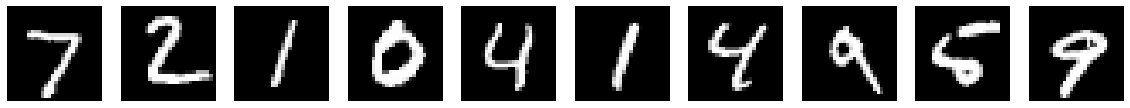

In [ ]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys_r')
    plt.axis('off')
plt.show()

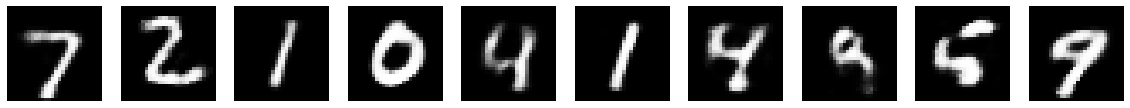

In [ ]:

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(pred[i].reshape(28,28), cmap='Greys_r')    
    plt.axis('off')
plt.show()